## Detecting Credit Card Fraud

Since we are working with preprocessed data, most of the features we are working with is obsecured. Good news is that we won't have to do much, if at all, data cleaning.

In [1]:
# Let's load the necessary packages and the data
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../../Data/creditcard.csv')
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

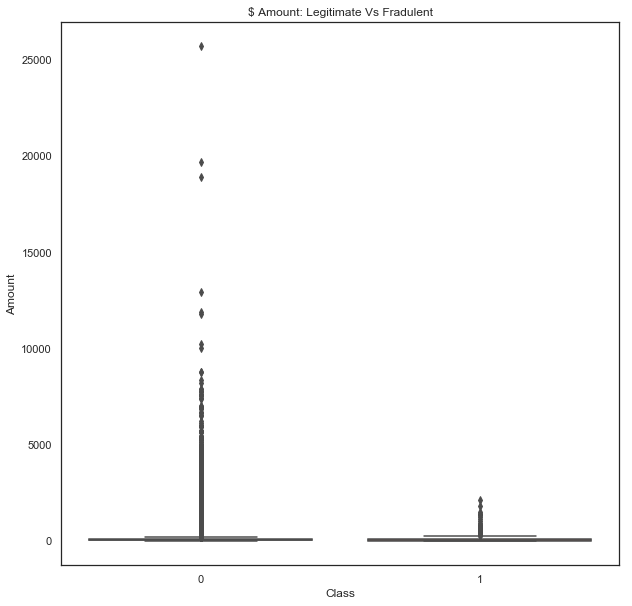

In [16]:
# I want to see if there is a significant difference in dollar amounts of legitimate vs fraudulent transactions
f, ax = plt.subplots(figsize=(10, 10))
sns.set(style='white')

sns.boxplot(x='Class', y='Amount', data=df)
plt.title('$ Amount: Legitimate Vs Fradulent')
plt.show()


The dollar amounts for the legitimate tranasctions dwarf those of the fraudulent kind, so it looks like the amount alone isn't a very good indicator of fraud.

Since principal component analysis was already done, we can trust that the features have already been reduced to describe the data. So let's move on to see if we can build a model using the data. In the documents for the data, it was mentioned that there is a very small number of fraudulent transactions so let's take a look for ourselves.

In [2]:
# In order to see how we can split the data, I want to see how many records we are working with
df.shape

(284807, 31)

In [5]:
# 280k+ rows, so since the percentage of fraudulent transactions is very low, let's leave a sizeable test data.
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

213605 71202 213605 71202


Let's use the vanilla logistic regression model to see how it does compared to ridge regression.

In [6]:
lr = linear_model.LogisticRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
c_mat = confusion_matrix(y_pred, y_test)

print('Coefficients:\n', lr_model.coef_)
print('R2 Score: ', lr_model.score(X_test, y_test))
print('Confusion Matrix:\n', c_mat)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients:
 [[-5.43948445e-05  2.19314009e-01 -5.28668488e-01 -9.15529531e-01
   2.99220268e-01  5.27528829e-02 -1.11981292e-01  3.61869665e-01
  -3.87720797e-01 -4.48078223e-01 -3.14584475e-01 -4.08661295e-01
   6.90020716e-02 -3.29886771e-01 -5.44685809e-01 -6.61713972e-01
  -2.96509390e-01 -3.49597782e-01  1.42322435e-01  1.51382199e-03
   2.56742282e-01  4.51000776e-01  6.06613482e-01  2.08903073e-01
   1.50033018e-02 -6.39675656e-01  1.58511669e-01 -9.37577361e-02
   5.71954889e-02 -5.79680261e-03]]
R2 Score:  0.9989607033510295
Confusion Matrix:
 [[71040    44]
 [   30    88]]


Out of 71202 records, only 118 were flagged as fraudulent. Since the nature of the dataset has a skewed distribution, it is hard to celebrate our model's accuracy of 99.9%. It is also worrying that we flagged 44 legitimate transactions as fraudulent, while missing 30 fraudulent transactions. Put in context of total transactions, sensitivity(Type I or false positive) was 44/71084 or 0.06% and specificity(Type II or false negative) was 30/118 or 25.42%. In this case, we are more interested in falsely classified fraudulent transactions, since this means that we missed 25% of all fradulent transactions.

In [8]:
# Let's see if increasing the size of the training data will help
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

lr2 = linear_model.LogisticRegression()
lr_model2 = lr2.fit(X_train, y_train)
y_pred = lr_model2.predict(X_test)
c_mat = confusion_matrix(y_pred, y_test)

print('Coefficients:\n', lr_model2.coef_)
print('R2 Score: ', lr_model2.score(X_test, y_test))
print('Confusion Matrix:\n', c_mat)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients:
 [[-6.73515017e-05  3.21960224e-01 -4.10882278e-01 -8.66300832e-01
   1.52866373e-01 -3.20600598e-02 -2.12922793e-02  4.29844103e-01
  -4.00475817e-01 -3.97694247e-01 -2.17941591e-01 -3.10656339e-01
   2.27428462e-02 -3.25809610e-01 -6.67594746e-01 -4.98746559e-01
  -3.28259707e-01 -4.83496024e-01  3.36400168e-02  1.77036988e-02
   1.22969843e-01  3.07554409e-01  4.13472150e-01  7.28898850e-02
  -1.65241871e-02 -4.42689754e-01  7.73864834e-02 -1.04821046e-01
   1.60332092e-02 -5.03903903e-03]]
R2 Score:  0.9991046662687406
Confusion Matrix:
 [[56837    35]
 [   16    74]]


So our type II error improved to 17.78%. Let's see if a boosted model does better just for comparison.

In [11]:
# gradient boost model
clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=5, subsample=0.9, random_state=26)
clf_model = clf.fit(X_train, y_train)
clf_y_pred = clf_model.predict(X_test)
clf_c_mat = confusion_matrix(clf_y_pred, y_test)

print('Accuracy: ', clf_model.score(X_test, y_test))
print('Confusion Matrix:\n', clf_c_mat)


Accuracy:  0.9989115550718023
Confusion Matrix:
 [[56842    51]
 [   11    58]]


Our gradient boosting model gave us 18.97% specificity which is slightly worse than our logistic classification model, and it took a while longer to train the data.